## Observations and Insights 

In [29]:
#mouse_metadata.iloc[:5,2:4]
#mouse_metadata.iloc[:,2].value_counts()
#mouse_metadata.at[4,'Sex']


In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how='left', on='Mouse ID')
unique_cnt_df = len(combined_df["Mouse ID"].unique())

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [31]:
# Checking the number of mice.
mice_cnt_df = combined_df['Mouse ID'].count()
print("With duplicates :",mice_cnt_df)

unique_mice_cnt = len(combined_df['Mouse ID'].unique())
print("With duplicates :",unique_mice_cnt)


With duplicates : 1893
With duplicates : 249


In [32]:
# # Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
combined_dup_df2 = combined_df[combined_df.duplicated(['Mouse ID', 'Timepoint'])] 
combined_dup_df2



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [33]:
# Optional: Get all the data for the duplicate mouse ID. 

combined_dup_df4 = combined_df[combined_df.duplicated(['Mouse ID',])] 
combined_dup_df4


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [34]:
#Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_df = combined_df.drop_duplicates(subset=['Mouse ID','Timepoint'])
clean_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [35]:
# Checking the number of mice in the clean DataFrame.

clean_data_df = clean_df['Mouse ID'].count()
print("Mice in clean DataFrame :",clean_data_df)


Mice in clean DataFrame : 1888


## Summary Statistics

In [36]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



In [37]:
mean_tumor = combined_df.groupby('Drug Regimen').mean() ['Tumor Volume (mm3)']

median_tumor = combined_df.groupby('Drug Regimen') ['Tumor Volume (mm3)'].median()

var_tumor = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()  
std_tumor =combined_df.groupby('Drug Regimen') ['Tumor Volume (mm3)'].std() 

sem_tumor = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()  

sum_stats_df = pd.DataFrame({"Mean of Tumor": mean_tumor,
                           "Median of Tumor": median_tumor, 
                           "Variance of Tumor": var_tumor, 
                           "STD of Tumor ": std_tumor, 
                           "SEM of Tumor ": sem_tumor
})
sum_stats_df

,Mean of Tumor,Median of Tumor,Variance of Tumor,STD of Tumor,SEM of Tumor
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [38]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for
# each regimen
sum_sem_df2 = pd.DataFrame({"Mean": mean_tumor,
                           "Median": median_tumor, 
                           "Variance": var_tumor, 
                           "Standard Deviation": std_tumor, 
                           "SEM": sem_tumor
})
sum_sem_df2



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [39]:
# Using the aggregation method, produce the same summary statistics in a single line
drugs_tot = pd.DataFrame(pd.value_counts(combined_df['Drug Regimen']))
drugs_tot

,Drug Regimen
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Placebo,181
Stelasyn,181
Infubinol,178
Ceftamin,178
Propriva,161


## Bar and Pie Charts

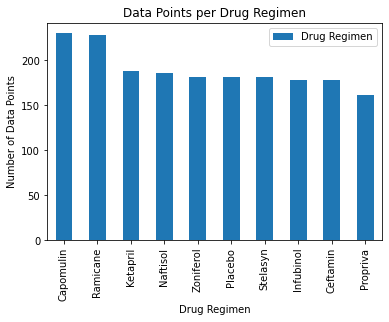

<Figure size 432x288 with 0 Axes>

In [40]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drugs_tot.plot(kind="bar")
plt.title("Data Points per Drug Regimen")
plt.ylabel("Number of Data Points")
plt.xlabel("Drug Regimen")
plt.show()
plt.tight_layout()


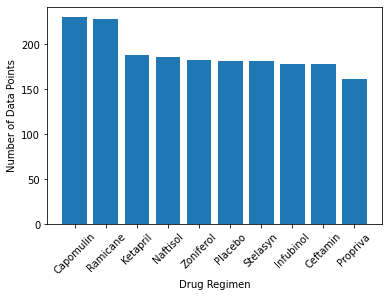

In [41]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = combined_df["Drug Regimen"].value_counts().index
y_axis = combined_df["Drug Regimen"].value_counts()
plt.bar(x_axis, y_axis)
plt.xticks(rotation=45)
plt.ylabel("Number of Data Points")
plt.xlabel("Drug Regimen")
plt.show()


In [42]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_tot = pd.value_counts(clean_df['Sex'])
gender_tot

Male      958
Female    930
Name: Sex, dtype: int64

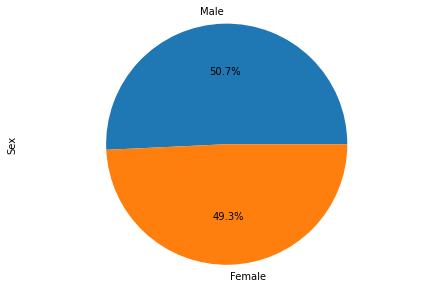

In [43]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_pandas = gender_tot.plot(kind="pie", y="sex", autopct='%1.1f%%')
gender_pandas.set_ylabel("Sex")

plt.tight_layout()
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [44]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: 

# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes
        
    # add subset 
    
    
    # Determine outliers using upper and lower bounds

Capomulin = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
Ramicane = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane"]
Infubinol = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol"]
Ceftamin = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin"]

x_axisCa = Capomulin["Tumor Volume (mm3)"]
x_axisRa = Ramicane["Tumor Volume (mm3)"]
x_axisIn = Infubinol["Tumor Volume (mm3)"]
x_axisCe = Ceftamin["Tumor Volume (mm3)"]

# print("Capomulin  :",Capomulin)
# print("Ramicane  :",Ramicane)
# print("Infubinol  :",Infubinol)
# print("Ceftamin  :",Ceftamin)

# print("x_Capomulin  :",x_axisCa)
# print("x_Ramicane  :",x_axisRa)

# print("x_Infubinol  :",x_axisIn)
# print("x_Ceftamin  :",x_axisCe)




In [45]:
quartiles_R = x_axisRa.quantile([.25,.5,.75])
lowerq_R = quartiles_R[0.25]
upperq_R = quartiles_R[0.75]

quartiles_Ca = x_axisCa.quantile([.25,.5,.75])
lowerq_Ca = quartiles_Ca[0.25]
upperq_Ca = quartiles_Ca[0.75]

iqr_Ca = upperq_Ca-lowerq_Ca

lower_bound_Ca = lowerq_Ca - (1.5*iqr_Ca)
upper_bound_Ca = upperq_Ca + (1.5*iqr_Ca)

print("Drug: Capomulin")
print(quartiles_Ca)
print(lowerq_Ca)
print(upperq_Ca)
print(iqr_Ca)

print(f"Values below {lower_bound_Ca} could be outliers.")
print(f"Values above {upper_bound_Ca} could be outliers.")

iqr_R = upperq_R-lowerq_R
lower_bound_R = lowerq_R - (1.5*iqr_R)
upper_bound_R = upperq_R + (1.5*iqr_R)



Drug: Capomulin
0.25    37.685933
0.50    41.557809
0.75    45.000000
Name: Tumor Volume (mm3), dtype: float64
37.685932865
45.0
7.314067135000002
Values below 26.714832162499995 could be outliers.
Values above 55.9711007025 could be outliers.


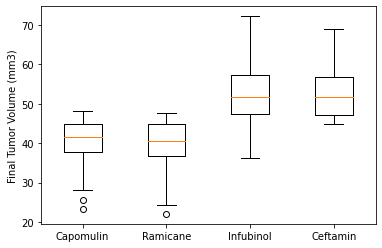

10      45.000000
11      43.878496
12      37.614948
13      38.177232
14      36.866876
          ...    
440     47.685963
1452    45.000000
1453    45.597064
1454    46.059608
1455    46.539206
Name: Tumor Volume (mm3), Length: 230, dtype: float64


In [46]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
ax1.boxplot([x_axisCa, x_axisRa, x_axisIn, x_axisCe])
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xticklabels(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.show()
print(x_axisCa)

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

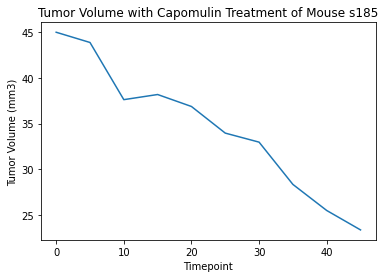

In [47]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

x_axis = combined_df.loc[combined_df["Mouse ID"] == "s185"]
x_axis = x_axis["Timepoint"]
                        
y_axis = combined_df.loc[combined_df["Mouse ID"] == "s185"]
y_axis = y_axis["Tumor Volume (mm3)"]

plt.plot(x_axis, y_axis)
plt.title("Tumor Volume with Capomulin Treatment of Mouse s185")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

In [48]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
clean_df
mouse_wt_capomulin = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
mouse_wt_capomulin

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


Text(0, 0.5, 'Tumor Volume (mm3)')

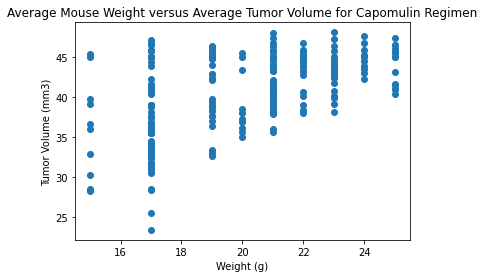

In [49]:
mouse_weight = mouse_wt_capomulin["Weight (g)"]
tumor_volume = mouse_wt_capomulin["Tumor Volume (mm3)"]
plt.scatter(mouse_weight, tumor_volume)
plt.title("Average Mouse Weight versus Average Tumor Volume for Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

## Correlation and Regression

The correlation between both weight and tumor volume is 0.53


Text(0, 0.5, 'Tumor Volume (mm3)')

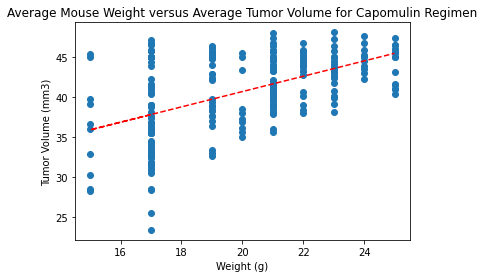

In [50]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(mouse_weight, tumor_volume)
print(f"The correlation between both weight and tumor volume is {round(correlation[0],2)}")

slope, intercept, rvalue, pvalue, stderr = st.linregress(mouse_weight, tumor_volume)
fit = slope * mouse_weight + intercept
plt.scatter(mouse_weight, tumor_volume)
plt.plot(mouse_weight, fit, "--", color="r")
plt.title("Average Mouse Weight versus Average Tumor Volume for Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")